# Visualizations and Simple Metrics

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.datasets
def get_iris_df():
    ds = sklearn.datasets.load_iris()
    df = pd.DataFrame(ds['data'],
        columns = ds['feature_names'])
    code_species_map = dict(zip(
        range(3), ds['target_names']))
    df['species'] = [code_species_map[c]
        for c in ds['target']]
    return df
df = get_iris_df()

In [5]:
sums_by_species = df.groupby('species').sum()
var = 'sepal width (cm)'
sums_by_species[var].plot(kind='pie', fontsize=20)
plt.ylabel(var, horizontalalignment='left')
plt.title('Breakdown for ' + var, fontsize=25)
plt.savefig('iris_pie_for_one_variable.png')
plt.close()

In [6]:
sums_by_species = df.groupby('species').sum()
sums_by_species.plot(kind='pie', subplots=True,
layout=(2,2), legend=False)
plt.title('Total Measurements, by Species')
plt.savefig('iris_pie_for_each_variable.png')
plt.close()

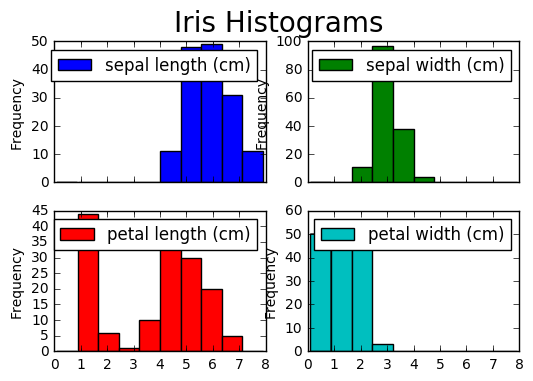

In [12]:
df.plot(kind='hist', subplots=True, layout=(2,2))
plt.suptitle('Iris Histograms', fontsize=20)
plt.show()

In [14]:
for spec in df['species'].unique():
    forspec = df[df['species']==spec]
    forspec['petal length (cm)'].plot(kind='hist', alpha=0.4, label=spec)
plt.legend(loc='upper right')
plt.suptitle('Petal Length by Species')
plt.savefig('iris_hist_by_spec.png')

In [15]:
col = df['petal length (cm)']
Average = col.mean()
Std = col.std()
Median = col.quantile(0.5)
Percentile25 = col.quantile(0.25)
Percentile75 = col.quantile(0.75)

In [ ]:
col = df['petal length (cm)']
Perc25 = col.quantile(0.25)
Perc75 = col.quantile(0.75)
Clean_Avg = col[(col>Perc25)&(col<Perc75)].mean()

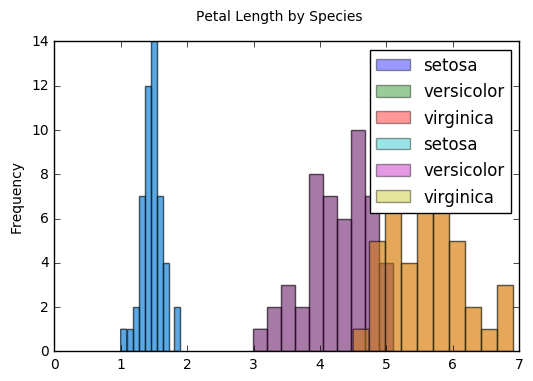

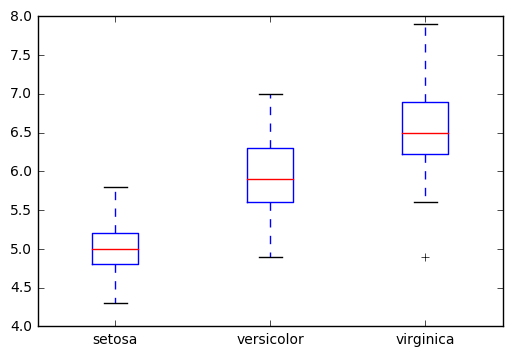

In [20]:
col = 'sepal length (cm)'
df['ind'] = pd.Series(df.index).apply(lambda i: i% 50)
df.pivot('ind','species')[col].plot(kind='box')
plt.show()

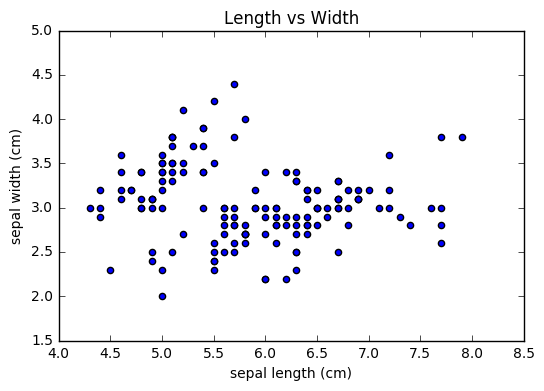

In [21]:
df.plot(kind="scatter",
x="sepal length (cm)", y="sepal width (cm)")
plt.title("Length vs Width")
plt.show()

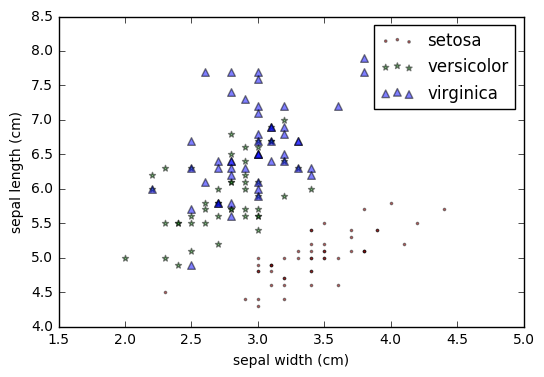

In [22]:
plt.close()
colors = ["r", "g", "b"]
markers= [".", "*", "^"]
fig, ax = plt.subplots(1, 1)
for i, spec in enumerate(df['species'].unique() ):
    ddf = df[df['species']==spec]
    ddf.plot(kind="scatter",x="sepal width (cm)", y="sepal length (cm)",alpha=0.5, s=10*(i+1), ax=ax,color=colors[i], marker=markers[i], label=spec)
plt.legend()
plt.show()

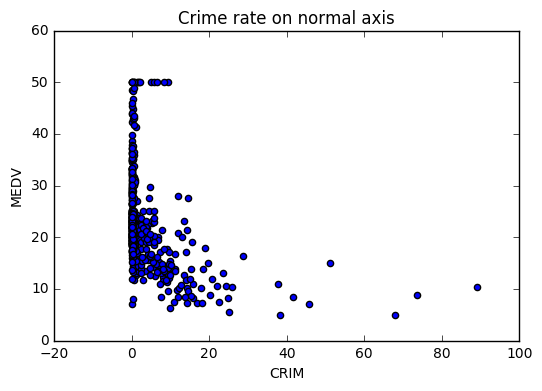

In [24]:
import pandas as pd
import sklearn.datasets as ds
import matplotlib.pyplot as plt
# Make Pandas dataframe
bs = ds.load_boston()
df = pd.DataFrame(bs.data, columns=bs.feature_names)
df['MEDV'] = bs.target
# Normal Scatterplot
df.plot(x='CRIM',y='MEDV',kind='scatter')
plt.title('Crime rate on normal axis')
plt.show()

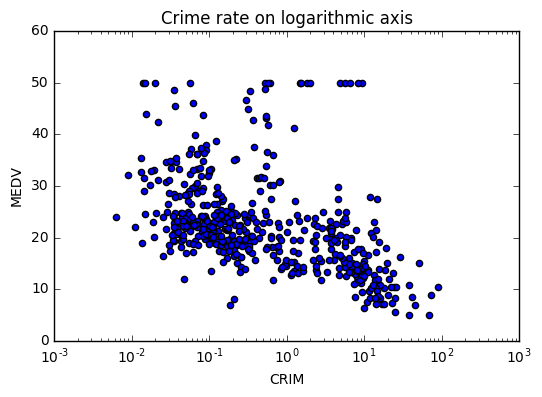

In [25]:
df.plot(x='CRIM',y='MEDV',kind='scatter',logx=True)
plt.title('Crime rate on logarithmic axis')
plt.show()

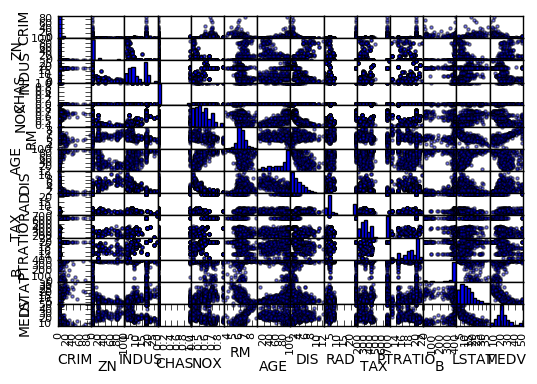

In [26]:
plt.close()
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

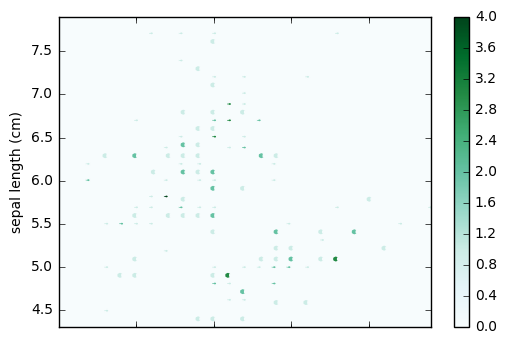

In [30]:
plt.close()
df = get_iris_df()
df.plot(kind="hexbin",
x="sepal width (cm)", y="sepal length (cm)")
plt.show()


In [31]:
df["sepal width (cm)"].corr(df["sepal length (cm)"]) # Pearson corr

-0.10936924995064937

In [32]:
df["sepal width (cm)"].corr(df["sepal length (cm)"], method="pearson")

-0.10936924995064937

In [33]:
df["sepal width (cm)"].corr(df["sepal length (cm)"], method="spearman")

-0.15945651848582867

In [34]:
df["sepal width (cm)"].corr(df["sepal length (cm)"], method="spearman")

-0.15945651848582867

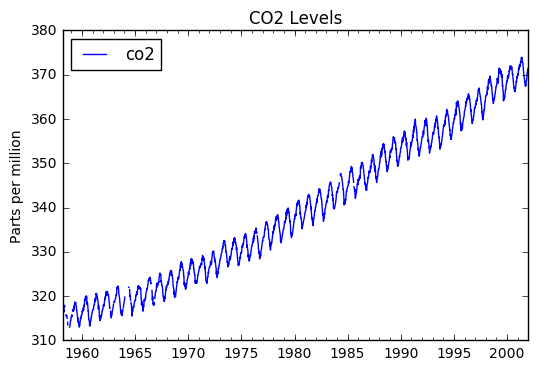

In [35]:
import statsmodels.api as sm
dta = sm.datasets.co2.load_pandas().data
dta.plot()
plt.title("CO2 Levels")
plt.ylabel("Parts per million")
plt.show()

In [18]:
import urllib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
# Get raw CSV data from the web
URL = "http://ichart.finance.yahoo.com/" +"table.csv?s=GOOG&c=2000"

#dat = urllib.urlopen(URL).read()
dat = requests.get(URL).content
open('foo.csv','w').write(dat)
# Make DataFrame, w timestamp as the index
df = pd.read_csv('foo.csv')
df.index = df['Date'].astype('datetime64')
df['LogClose'] = np.log(df['Close'])
df['Close'].plot()
plt.title("Normal Axis")
plt.show()
df['Close'].plot(logy=True)
plt.title("Logarithmic Axis")
plt.show()

ConnectionError: HTTPConnectionPool(host='ichart.finance.yahoo.com', port=80): Max retries exceeded with url: /table.csv?s=GOOG&c=2000 (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x000002352D2D15C0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))